In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">1. Setup & Aesthetics</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Sklearn Modules
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Configuration
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Define a custom palette for consistency (Teal/Coral theme)

sns.set_context("notebook", font_scale=1.1)
sns.set_style("whitegrid", {"axes.grid": False})
PALETTE = ["#2E86AB", "#A23B72", "#F18F01", "#C73E1D", "#3B1F2B"]
sns.set_palette(PALETTE)

print("✅ Libraries Loaded & Style Configured")

✅ Libraries Loaded & Style Configured


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">2. Data Loading</h1>
</div>

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

print(f"📂 Dataset Loaded")

📂 Dataset Loaded


# First Few Rows

In [49]:
train_df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


# Shape and Duplicated value

In [16]:
print(f"   Shape: {train_df.shape[0]} rows, {train_df.shape[1]} columns")
print(f"   Duplicate Rows: {train_df.duplicated().sum()}")

   Shape: 630000 rows, 13 columns
   Duplicate Rows: 0


# Missing Value Check

In [17]:
missing = train_df.isnull().sum()
if missing.sum() > 0:
    print("⚠️ Missing Values Found:")
    print(missing[missing > 0])
else:
    print("✅ No Missing Values")

✅ No Missing Values


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [22]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,630000.0,314999.500000,181865.479132,0.000,157499.75,314999.5,472499.25,629999.00
age,630000.0,20.545821,2.260238,17.000,19.00,21.0,23.00,24.00
study_hours,630000.0,4.002337,2.359880,0.080,1.97,4.0,6.05,7.91
class_attendance,630000.0,71.987261,17.430098,40.600,57.00,72.6,87.20,99.40
sleep_hours,630000.0,7.072758,1.744811,4.100,5.60,7.1,8.60,9.90
exam_score,630000.0,62.506672,18.916884,19.599,48.80,62.6,76.30,100.00


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">3. EDA (Target Analysis)</h1>
</div>

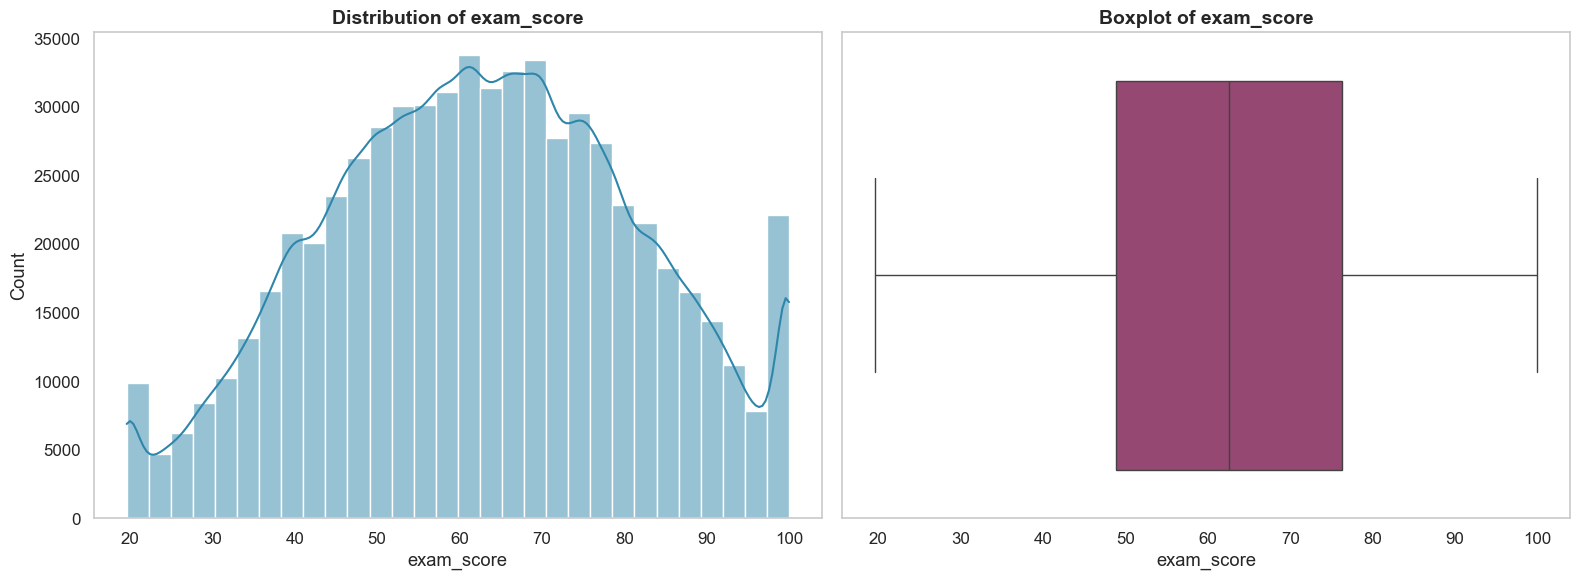

In [7]:
def plot_target_distribution(df, target_col):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram + KDE
    sns.histplot(df[target_col], kde=True, color=PALETTE[0], bins=30, ax=ax[0])
    ax[0].set_title(f"Distribution of {target_col}", fontsize=14, fontweight='bold')
    
    # Boxplot (for outliers)
    sns.boxplot(x=df[target_col], color=PALETTE[1], ax=ax[1])
    ax[1].set_title(f"Boxplot of {target_col}", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_target_distribution(train_df, "exam_score")

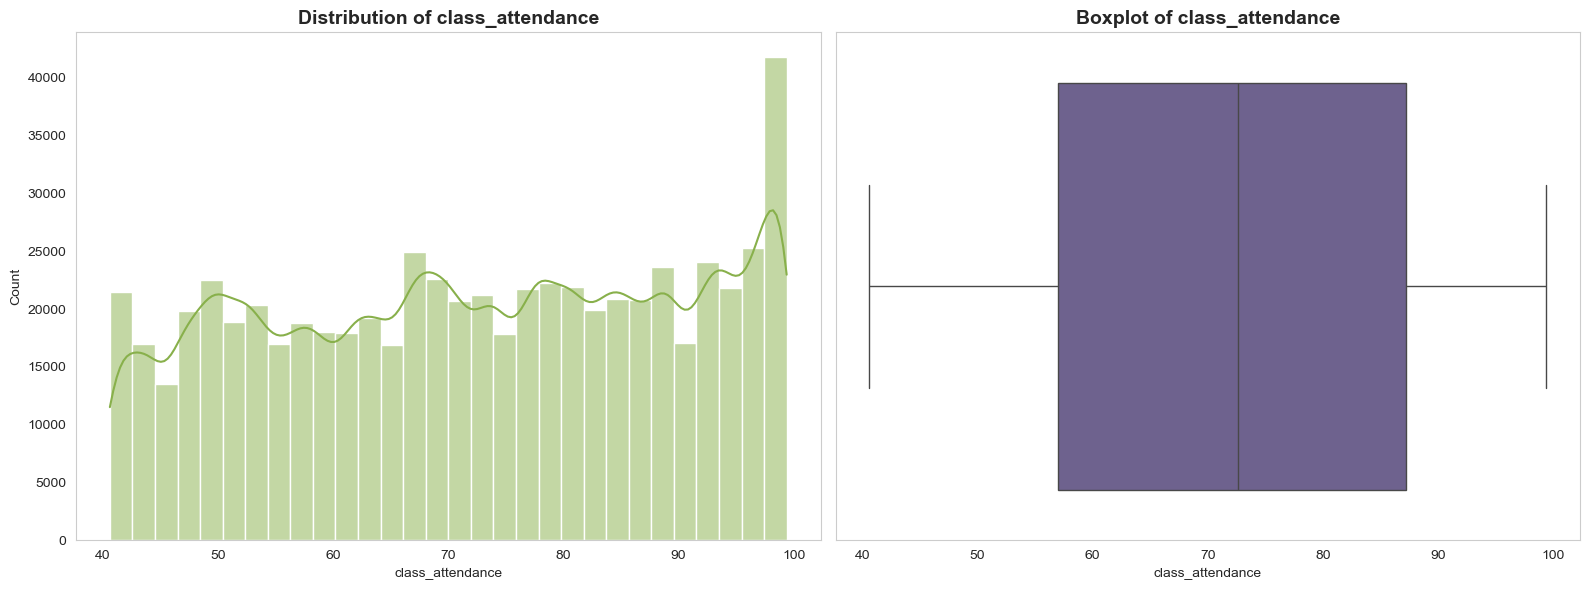

In [ ]:
def plot_target_distribution(df, target_col):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram + KDE
    sns.histplot(df[target_col], kde=True, color=PALETTE[3], bins=30, ax=ax[0])
    ax[0].set_title(f"Distribution of {target_col}", fontsize=14, fontweight='bold')
    
    # Boxplot (for outliers)
    sns.boxplot(x=df[target_col], color=PALETTE[2], ax=ax[1])
    ax[1].set_title(f"Boxplot of {target_col}", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_target_distribution(train_df, "class_attendance")

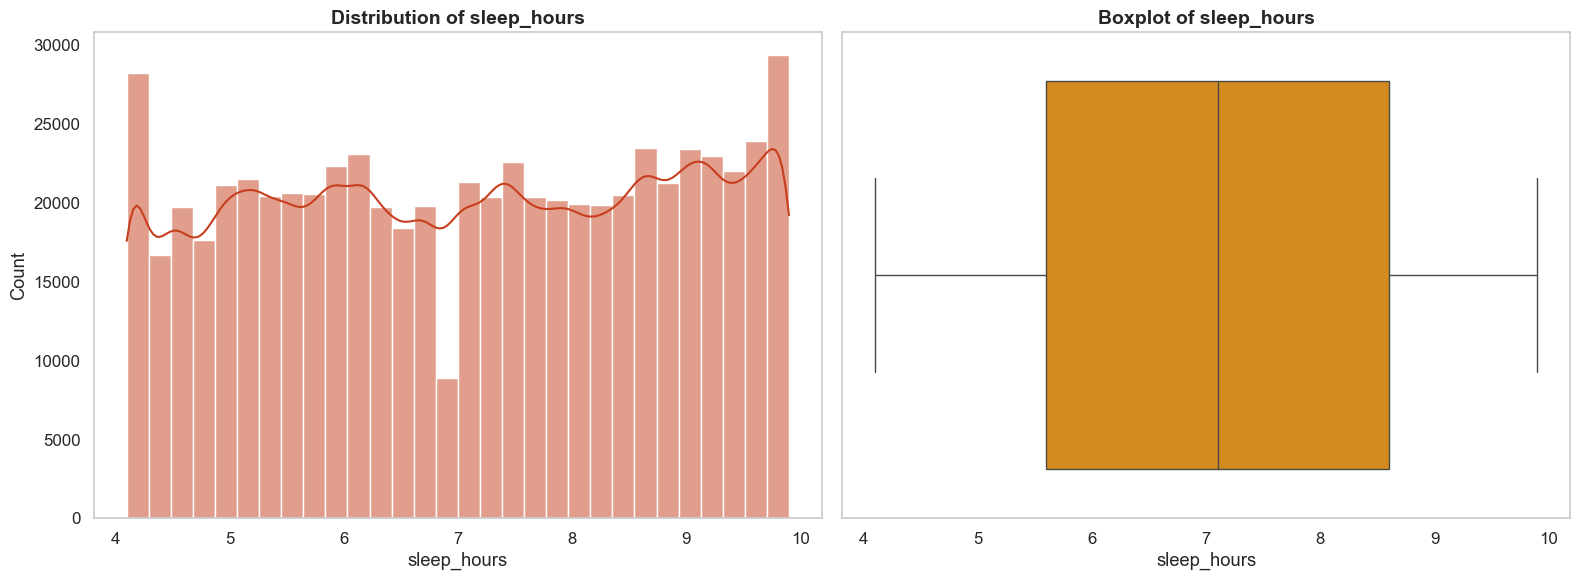

In [6]:
def plot_target_distribution(df, target_col):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram + KDE
    sns.histplot(df[target_col], kde=True, color=PALETTE[3], bins=30, ax=ax[0])
    ax[0].set_title(f"Distribution of {target_col}", fontsize=14, fontweight='bold')
    
    # Boxplot (for outliers)
    sns.boxplot(x=df[target_col], color=PALETTE[2], ax=ax[1])
    ax[1].set_title(f"Boxplot of {target_col}", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_target_distribution(train_df, "sleep_hours")

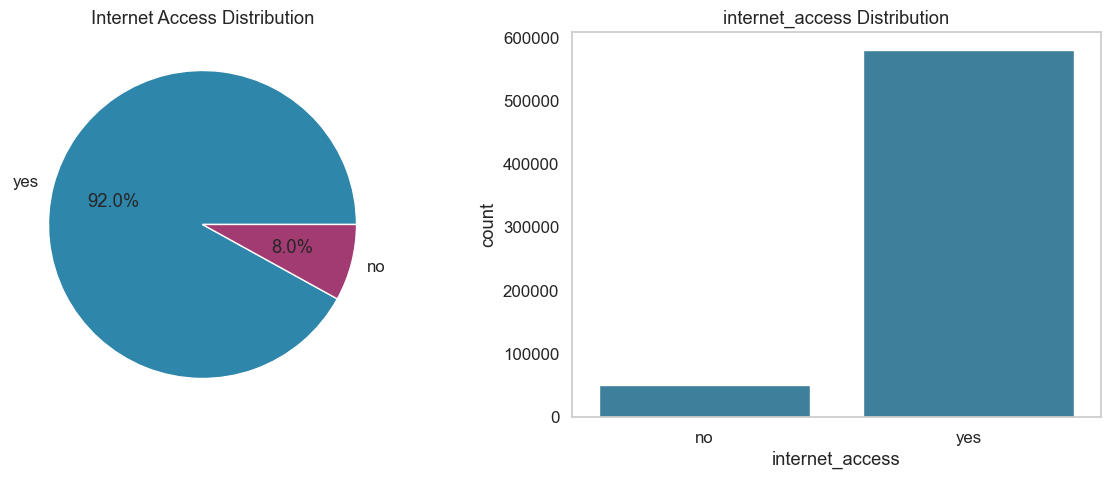

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts = train_df["internet_access"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=PALETTE[:len(counts)])
plt.title("Internet Access Distribution")

plt.subplot(1,2,2)
sns.countplot(x=train_df["internet_access"])
plt.title("internet_access Distribution")
plt.show()

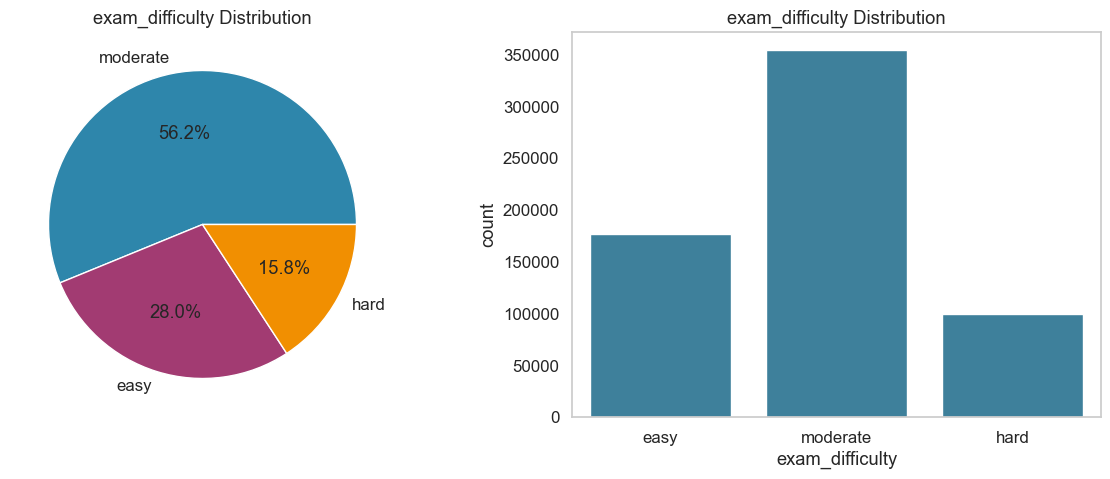

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts = train_df["exam_difficulty"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=PALETTE[:len(counts)])
plt.title("exam_difficulty Distribution")

plt.subplot(1,2,2)
sns.countplot(x=train_df["exam_difficulty"])
plt.title("exam_difficulty Distribution")
plt.show()

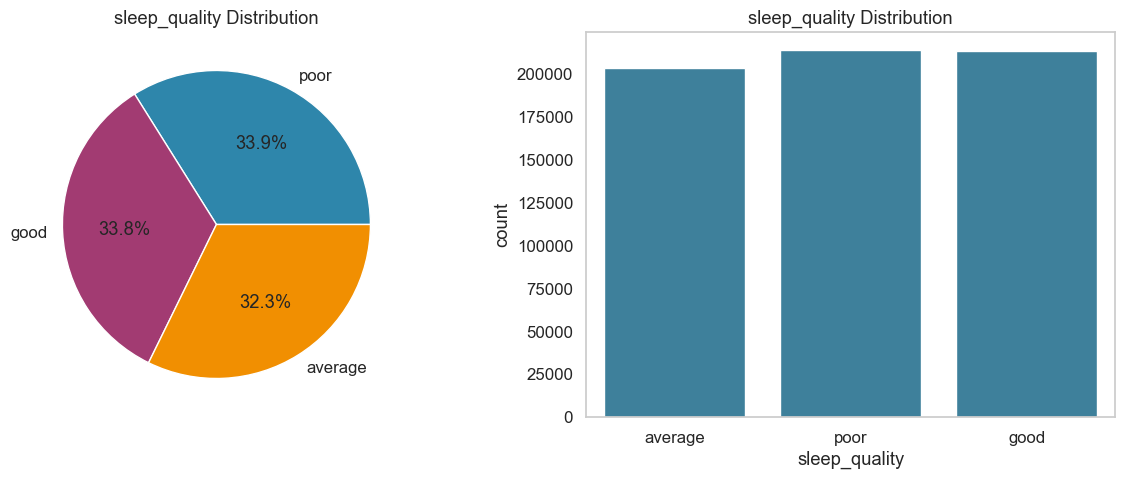

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts = train_df["sleep_quality"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=PALETTE[:len(counts)])
plt.title("sleep_quality Distribution")

plt.subplot(1,2,2)
sns.countplot(x=train_df["sleep_quality"])
plt.title("sleep_quality Distribution")
plt.show()

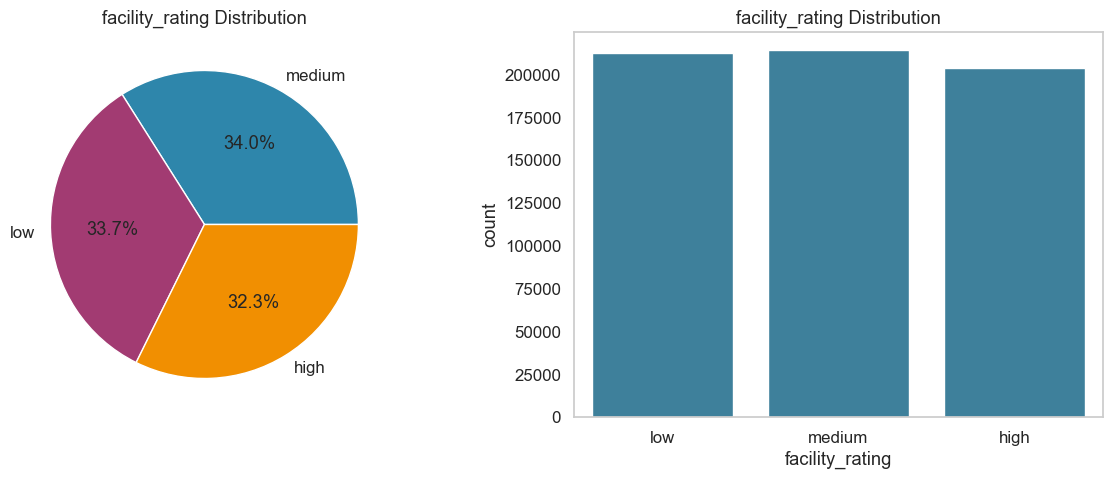

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts = train_df["facility_rating"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=PALETTE[:len(counts)])
plt.title("facility_rating Distribution")

plt.subplot(1,2,2)
sns.countplot(x=train_df["facility_rating"])
plt.title("facility_rating Distribution")
plt.show()

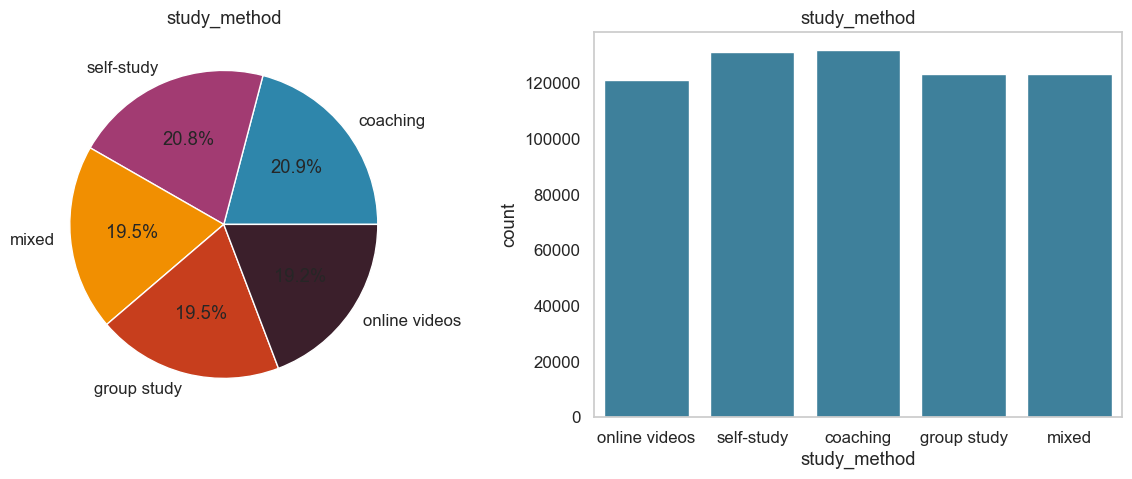

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
counts = train_df["study_method"].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=PALETTE[:len(counts)])
plt.title("study_method")

plt.subplot(1,2,2)
sns.countplot(x=train_df["study_method"])
plt.title("study_method")
plt.show()

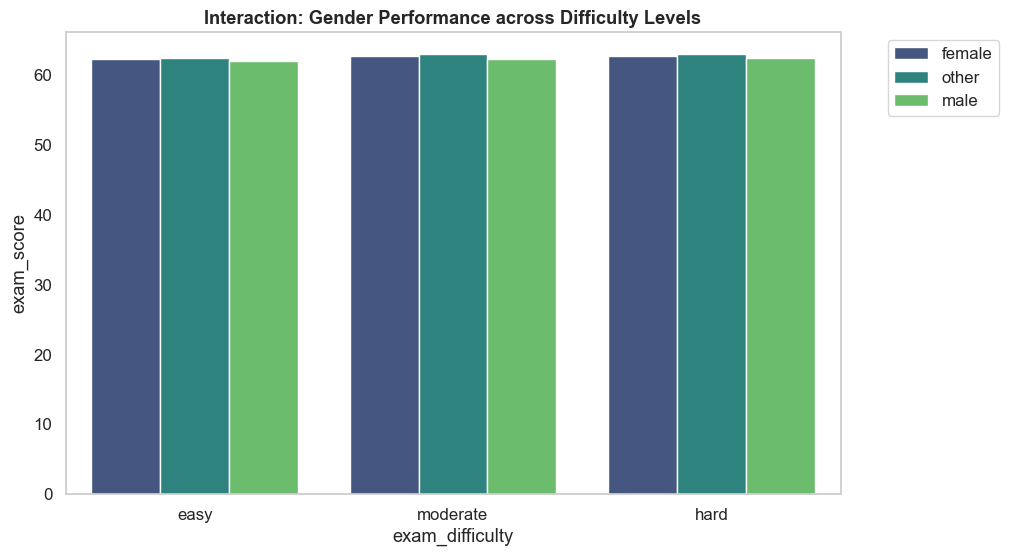

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='exam_difficulty', y='exam_score', hue='gender', data=train_df, palette="viridis", errorbar=None)
plt.title("Interaction: Gender Performance across Difficulty Levels", fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

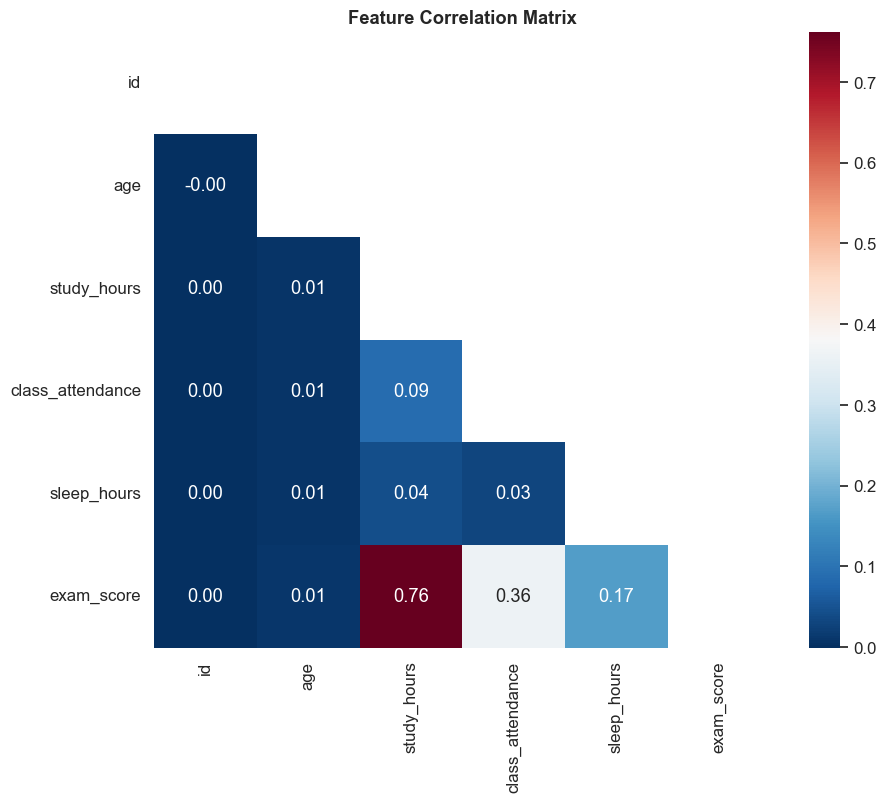

In [10]:
plt.figure(figsize=(10, 8))
# Select only numerical columns automatically
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
corr = train_df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r", square=True)
plt.title("Feature Correlation Matrix", fontweight='bold')
plt.show()

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">3.1. Advanced Categorical Analysis</h1>
</div>

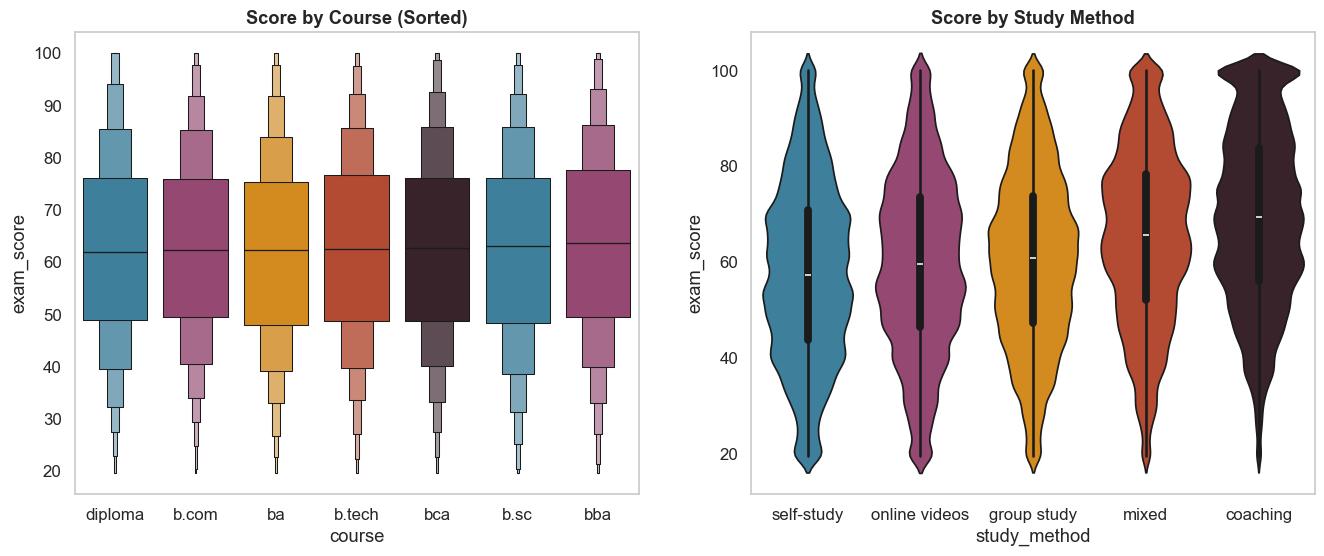

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Sort order by median score for better readability
order_course = train_df.groupby('course')['exam_score'].median().sort_values().index
sns.boxenplot(x='course', y='exam_score', data=train_df, order=order_course, palette=PALETTE, ax=axes[0])
axes[0].set_title("Score by Course (Sorted)", fontweight='bold')

order_method = train_df.groupby('study_method')['exam_score'].median().sort_values().index
sns.violinplot(x='study_method', y='exam_score', data=train_df, order=order_method, palette=PALETTE, ax=axes[1])
axes[1].set_title("Score by Study Method", fontweight='bold')
plt.show()

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">4. Preprocessing Pipeline</h1>
</div>

In [38]:
# Define features
X = train_df.drop(['id', 'exam_score'], axis=1)
y = train_df['exam_score']

# Separate columns
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# --- PREPROCESSING PIPELINE ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

print("✅ Pipeline Created: Scaler for Numericals, OneHot for Categoricals.")

✅ Pipeline Created: Scaler for Numericals, OneHot for Categoricals.


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">5. Model Comparison with Cross-Validation</h1>
</div>

In [ ]:
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
# }

# # Evaluate
# results = []
# names = []

# print("🚀 Starting Model Training...")

# for name, model in models.items():
#     # Create full pipeline (Preprocess -> Model)
#     my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                   ('model', model)])
    
#     # 5-Fold Cross Validation
#     cv_scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')
    
#     # Convert to positive RMSE
#     rmse_scores = -cv_scores
#     results.append(rmse_scores)
#     names.append(name)
    
#     print(f"   🔹 {name}: RMSE = {np.mean(rmse_scores):.4f} (+/- {np.std(rmse_scores):.4f})")

# # Visual Comparison
# plt.figure(figsize=(10, 5))
# plt.boxplot(results, labels=names, patch_artist=True)
# plt.title("Model Comparison (Lower RMSE is Better)", fontsize=14, fontweight='bold')
# plt.ylabel("RMSE Score")
# plt.show()

In [40]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', LinearRegression())])

In [42]:
cv_scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Convert to positive RMSE
rmse_scores = -cv_scores

print(f"   🔹RMSE = {np.mean(rmse_scores):.4f} (std = {np.std(rmse_scores):.4f})")
my_pipeline.fit(X,y)

   🔹RMSE = 8.8948 (std = 0.0109)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">6. Final Submission</h1>
</div>

In [62]:
result=my_pipeline.predict(test_df)

submission=pd.DataFrame({"Submission":result})
submission.to_csv("submission.csv")
submission.head()

,Submission
0,71.778789
1,69.478481
2,87.434598
3,54.923805
4,47.305416


---
# Note
Thank you for exploring this work!<br>

If you find it helpful, please consider upvoting it ❤️.<br>

Your support is greatly appreciated 🤩!<br>

# Thanks!

<div style="border-radius: 100px 100px 0px 0px; border: 2px solid black; padding: 20px; background-color: green; text-align: center; box-shadow: 0px 2px 4px yellow;width:95%">
    <h1 style="color: yellow; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">The End......</h1>
</div>